In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib
font = {'family' : 'Times New Roman',
        'size'   : 14}

matplotlib.rc('font', **font)

In [2]:
data = pd.read_csv("dataset/adult.csv")
data["income"] = data["income"].replace("<=50K",0).replace(">50K",1)
data.replace('?',np.NaN,inplace=True)
data.fillna(method='ffill',inplace=True)

enc = LabelEncoder()
for i in data.columns:
    data[i]=enc.fit_transform(data[i])

#data = data.sample(frac=1).reset_index()

X = data.drop("income", axis=1)
y = data["income"]


In [3]:
# Initialize SVM model
svm_model = SVC()  # You can choose different kernels based on your data characteristics

# Train the SVM model on the entire dataset
svm_model.fit(X, y)

# Make predictions on the training data
#y_pred = svm_model.predict(X)

# Plot the points
#plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=50)
#plt.title('SVM Decision Boundary and Data Points')

# Plot the decision boundary
#ax = plt.gca()
#xlim = ax.get_xlim()
#ylim = ax.get_ylim()

# Create grid to evaluate model
#xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
#Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary and margins
#Z = Z.reshape(xx.shape)
#plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Highlight the support vectors
#plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

# Count points inside the boundary
decision_values = svm_model.decision_function(X)
threeshold = decision_values.ptp() * 0.01 # 10%
points_inside_boundary = np.sum((decision_values >= -threeshold) & (decision_values <= threeshold))
print(f"Number of points inside the boundary: {points_inside_boundary}")

Number of points inside the boundary: 0


In [4]:
threeshold = decision_values.ptp() * 0.1 # 10%
points_inside_boundary = np.sum((decision_values >= -threeshold) & (decision_values <= threeshold))
print(f"Number of points inside the boundary: {points_inside_boundary}")

Number of points inside the boundary: 0


In [5]:
'''
#data = load_digits()
data = load_wine()
X = data.data
y = data.target
[round(data.data.shape[0]*x) for x in [0.1, 0.2, 0.4, 0.8, 1] ]
'''

'\n#data = load_digits()\ndata = load_wine()\nX = data.data\ny = data.target\n[round(data.data.shape[0]*x) for x in [0.1, 0.2, 0.4, 0.8, 1] ]\n'

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [7]:
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=1234),
    'Gradient Boosting': GradientBoostingClassifier(random_state=1234),
    'Support Vector Machine': SVC(random_state=1234),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=1234),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=1234),
    'Naive Bayes': GaussianNB()
}

In [8]:
classifier_names = list(classifiers.keys())
dataset_sizes = [0.1, 0.2, 0.4, 0.8, 1]
metrics = {
    'Accuracy': np.zeros((len(classifiers), len(dataset_sizes))),
    'Precision': np.zeros((len(classifiers), len(dataset_sizes))),
    'Recall': np.zeros((len(classifiers), len(dataset_sizes))),
    'F1 Score': np.zeros((len(classifiers), len(dataset_sizes)))
}

In [9]:
for i, size in enumerate(dataset_sizes):
    # Assuming you want to use the first 'size' rows as the training set
    split = round(len(X_train) * size)
    train_X = X_train[:split]
    train_y = y_train[:split]

    for j, (classifier_name, classifier) in enumerate(classifiers.items()):
        # Standardize the features (optional but often recommended)
        scaler = StandardScaler()
        train_X_scaled = scaler.fit_transform(train_X)
        test_X_scaled = scaler.transform(X_test)

        # Train the classifier
        classifier.fit(train_X_scaled, train_y)

        # Make predictions on the fixed test set
        predictions = classifier.predict(test_X_scaled)
        # Calculate metrics and store in the metrics dictionary
        metrics['Accuracy'][j, i] = accuracy_score(y_test, predictions)
        metrics['Precision'][j, i] = precision_score(y_test, predictions, average='weighted')
        metrics['Recall'][j, i] = recall_score(y_test, predictions, average='weighted')
        metrics['F1 Score'][j, i] = f1_score(y_test, predictions, average='weighted')

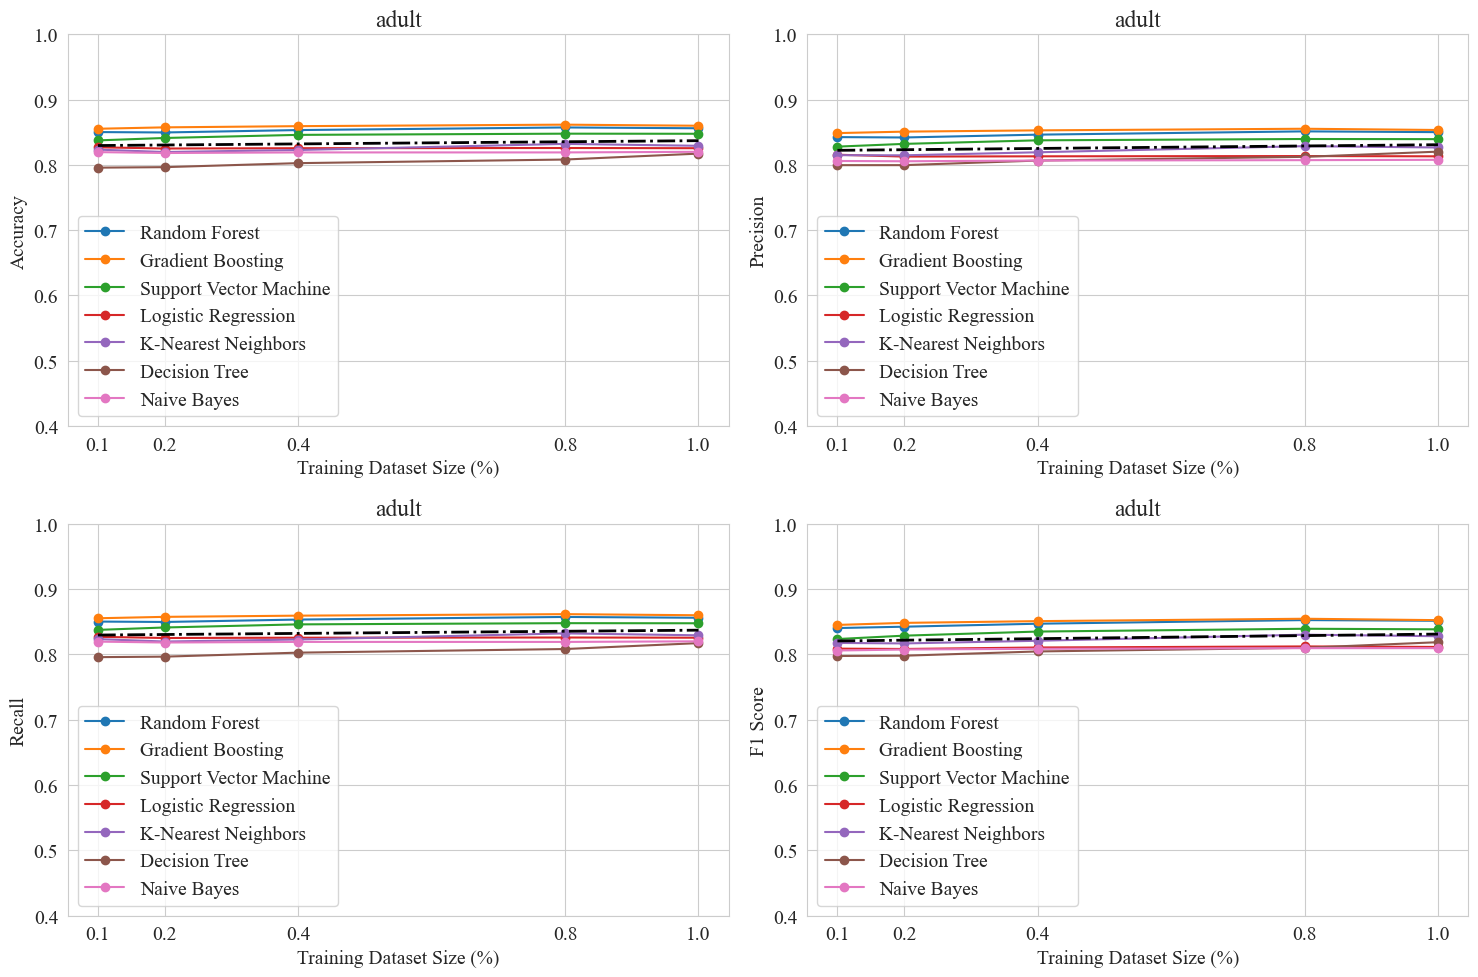

In [10]:
# Plotting
plt.figure(figsize=(15, 10))

for k, metric in metrics.items():
    plt.subplot(2, 2, list(metrics.keys()).index(k) + 1)
    for i in range(len(classifiers)):
        plt.plot(dataset_sizes, metric[i, :], label=classifier_names[i], marker='o')
        plt.title(f'adult')
        plt.xticks(dataset_sizes)
        plt.xlabel('Training Dataset Size (%)')
        plt.ylabel(k)
        plt.legend()
    z = sorted(zip(dataset_sizes, np.mean(metric,axis=0)))
    x=[j[0] for j in z]
    y=[j[1] for j in z]
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x),color='black',linestyle='-.',linewidth=2)
    plt.ylim(0.4,1)

plt.tight_layout()
plt.savefig(f'plots/size_adult.svg', format='svg')
plt.show()